In [79]:
#import module
import numpy as np
import pandas as pd

, encoding='latin-1',engine = "python"

In [80]:
# Dataset
df = pd.read_csv(r'C:\Users\rahul\Documents\spam.csv', encoding='latin-1',engine = "python")


In [81]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
431,ham,Does she usually take fifteen fucking minutes ...,NaN,NaN,NaN
2629,ham,Hey there! Glad u r better now. I hear u treat...,NaN,NaN,NaN
2469,ham,* Am on my way,NaN,NaN,NaN
2784,ham,"K, wat s tht incident?",NaN,NaN,NaN
3200,ham,Nice.nice.how is it working?,NaN,NaN,NaN


In [82]:
df.shape

(5572, 5)

### Data Cleaning

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [84]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [85]:
df.sample(5)

,v1,v2
4018,spam,U've been selected to stay in 1 of 250 top Bri...
339,ham,U calling me right? Call my hand phone...
970,ham,"Yar lor he wan 2 go c horse racing today mah, ..."
1849,ham,You got job in wipro:)you will get every thing...
3858,spam,Win the newest åÒHarry Potter and the Order of...


In [86]:
# renaming the cols2
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
3168,ham,"Haven't seen my facebook, huh? Lol!"
4530,ham,I wish things were different. I wonder when i ...
1317,spam,Win the newest ÛÏHarry Potter and the Order o...
2794,ham,How will I creep on you now? ;_;


In [87]:
print(df.columns.tolist())

['target', 'text']


In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [89]:
df['target'] = encoder.fit_transform(df['target'])

In [90]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [92]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [93]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [94]:
df.duplicated().sum()

np.int64(0)

In [95]:
df.shape

(5169, 2)

In [96]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

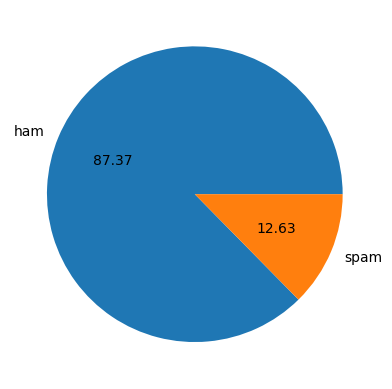

In [98]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [99]:
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"].values)

In [100]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [102]:
X = vectorizer.fit_transform(df["text"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 8672))

In [103]:
y = df["target"]

In [104]:
p, k = len(df[df["target"] == 0]), len(df[df["target"] == 1])

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Naive Bayes Classifier

In [107]:
from sklearn.naive_bayes import MultinomialNB

In [108]:
naive_bayes_model = MultinomialNB()

In [109]:
naive_bayes_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [110]:
nb_predictions = naive_bayes_model.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import r2_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score

In [112]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))
print("Precision_score: ", precision_score(y_test, nb_predictions))
print("Recall_score: ", recall_score(y_test, nb_predictions))
print("f1_score: ", f1_score(y_test, nb_predictions))

Naive Bayes Model:
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  1.0
Recall_score:  0.6827586206896552
f1_score:  0.8114754098360656


T

### Train Logistic Regression Model

In [113]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

In [114]:
logistic_regression_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [115]:
lr_predictions = logistic_regression_model.predict(X_test)

In [116]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  0.9714285714285714
Recall_score:  0.7034482758620689
f1_score:  0.816


### Train support vector Machine model

In [118]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

In [119]:
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [120]:
svm_predictions = svm_model.predict(X_test)

In [121]:
print("Support Vector Machine (SVM) Model:")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print("Accuracy: ", accuracy_score(y_test, svm_predictions))
print("r2_Score: ", r2_score(y_test, svm_predictions))
print("Precision_score: ", precision_score(y_test, svm_predictions))
print("Recall_score: ", recall_score(y_test, svm_predictions))
print("f1_score: ", f1_score(y_test, svm_predictions))

Support Vector Machine (SVM) Model:
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy:  0.9835589941972921
r2_Score:  0.8636360110158644
Precision_score:  0.9776119402985075
Recall_score:  0.903448275862069
f1_score:  0.9390681003584229
